In [3]:
import numpy as np
import pandas as pd
import random
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn
pd.options.display.float_format = '{:,.0f}'.format 


C:\Users\20193623\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df_s = pd.read_csv('topicairlinesentiment.csv')    #opening and selecting the rows that contain relevent infomration 
df_s = df_s[df_s['Topic'].notna()]
df_m = pd.read_csv('sent_mention.csv')

In [5]:
def sentiment_topic_airline(airline : str , topic : str) -> ".jpg file" :
    """Saves a jpg of a histogram of the sentiment per airline about a topic.
    """
    topic_label =  {'baggage': '1',           # dictionary for decoding of variables in df
      'delay': '2',
      'pollute': '3',
      'cancel': '4',
      'service': '5',
      'ticket': '6',
      'corona': '7'}

    color_airline = { 'KLM' : '#00a1e4' ,    # colorcode for airline color used in plots 
          'British Airways' : '#A9A9A9' , 
          'American Air' : '#e92026' , 
          'Lufthansa': '#00235f' , 
          'RyanAir' : '#f1c933'}
    
    df = df_s[df_s[airline]==1]               # creates a data frame for the desired airline


    df_topic = df[df['Topic'] == int(topic_label[topic])]   #  creates a data frame for the desired topic and airline 

    df_topic['sentiment'].plot.hist(grid=True, bins=7, rwidth=0.9,        # plots the historgram with labels and title 
                   color=color_airline[airline])  # selects the color that applies to the airline from the dictionary 
    plt.title('Sentiment of tweets towards {} about {}'.format(airline, topic))
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    plt.xticks([-1,0,1])
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Delay Sentiment/sentiment_{}_{}.jpg'.format(airline , topic))  # saves the plot to a folder in the same dir as the notebook 


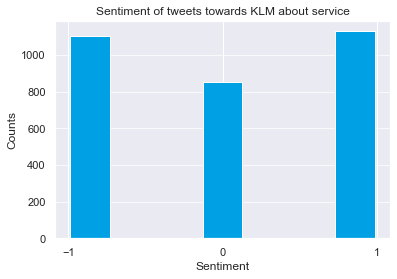

In [49]:
sentiment_topic_airline('KLM' , 'service')